In [1]:
from __future__ import annotations

In [2]:
from IPython.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [9]:
import os
import datetime
import numpy as np
import sklearn.metrics
import tensorflow as tf
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

import seaborn as sns
sns.set_style('dark')
sns.set(rc={'figure.figsize': (10, 10), 'axes.grid': False})

In [4]:
rng = np.random.default_rng()

In [5]:
def plot_grid(X, ncols=2, nrows=2, figsize=(10, 10), hide_axes=True):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    imgs = X[rng.choice(np.arange(X.shape[0]), size=ax.shape)].reshape(*ax.shape, 28, 28)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i, j].imshow(imgs[i, j], cmap='gray')
            if hide_axes:
                ax[i, j].get_xaxis().set_visible(False)
                ax[i, j].get_yaxis().set_visible(False)

In [6]:
def plot_grid_and_label(X, y, model, ncols=2, nrows=2, figsize=(10, 10), hide_axes=True, flatten_image=True, label_description=None):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    idx = rng.choice(np.arange(X.shape[0]), size=ax.shape)
    imgs, labels = X[idx], y[idx]
    inputs = imgs.reshape(-1, *imgs.shape[2:])
    
    if flatten_image:
        inputs = inputs.reshape(nrows * ncols, -1)
        
    map_label = (lambda x: x) if label_description is None else (lambda x: label_description[x])
        
    preds = np.argmax(tf.nn.softmax(model.predict(inputs)), axis=-1).reshape(nrows, ncols)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i, j].imshow(imgs[i, j], cmap='gray')
            ax[i, j].set_title(f'label: {map_label(labels[i, j])}, prediction: {map_label(preds[i, j])}')
            if hide_axes:
                ax[i, j].get_xaxis().set_visible(False)
                ax[i, j].get_yaxis().set_visible(False)

In [ ]:
#X, y = sklearn.datasets.fetch_openml('Kuzushiji-49', version=1, return_X_y=True, as_frame=False, parser='auto')
#y = np.array(list(map(int, y)))
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
with open('Kuzushjii/X.pickle', 'wb') as handle:
    pickle.dump(X, handle)

with open('Kuzushjii/y.pickle', 'wb') as handle:
    pickle.dump(y, handle)

In [10]:
with open('Kuzushjii/X.pickle', 'rb') as handle:
    X = pickle.load(handle)

with open('Kuzushjii/y.pickle', 'rb') as handle:
    y  = pickle.load(handle)
    
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
label_description = [
     'A',   'I',   'U',  'E',  'O',
    'KA',  'KI',  'KU', 'KE', 'KO',
    'SA', 'SHI',  'SU', 'SE', 'SO',
    'TA', 'CHI', 'TSU', 'TE', 'TO',
    'NA',  'NI',  'NU', 'NE', 'NO',
    'HA',  'HI',  'FU', 'HE', 'HO',
    'MA',  'MI',  'MU', 'ME', 'MO',
    'YA',         'YU',       'YO',
    'RA',  'RI',  'RU', 'RE', 'RO',
    'WA',  'II',        'EE', 'WO',
     'N',  'IT'
]

In [13]:
counts = { j: np.sum(y_train == i) for i, j in enumerate(label_description) }

In [14]:
counts # what to do with imbalanced classes?

{'A': 5272,
 'I': 5274,
 'U': 5220,
 'E': 667,
 'O': 5276,
 'KA': 5259,
 'KI': 5265,
 'KU': 5244,
 'KE': 4092,
 'KO': 5259,
 'SA': 5226,
 'SHI': 5236,
 'SU': 5263,
 'SE': 3612,
 'SO': 3333,
 'TA': 5223,
 'CHI': 2278,
 'TSU': 5239,
 'TE': 5259,
 'TO': 5236,
 'NA': 5218,
 'NI': 5259,
 'NU': 1821,
 'NE': 2084,
 'NO': 5247,
 'HA': 5248,
 'HI': 4467,
 'FU': 5243,
 'HE': 5233,
 'HO': 1754,
 'MA': 5264,
 'MI': 2715,
 'MU': 1497,
 'ME': 2927,
 'MO': 5306,
 'YA': 5240,
 'YU': 1389,
 'YO': 5278,
 'RA': 5300,
 'RI': 5330,
 'RU': 5223,
 'RE': 5261,
 'RO': 1850,
 'WA': 2076,
 'II': 364,
 'EE': 338,
 'WO': 5259,
 'N': 5213,
 'IT': 3047}

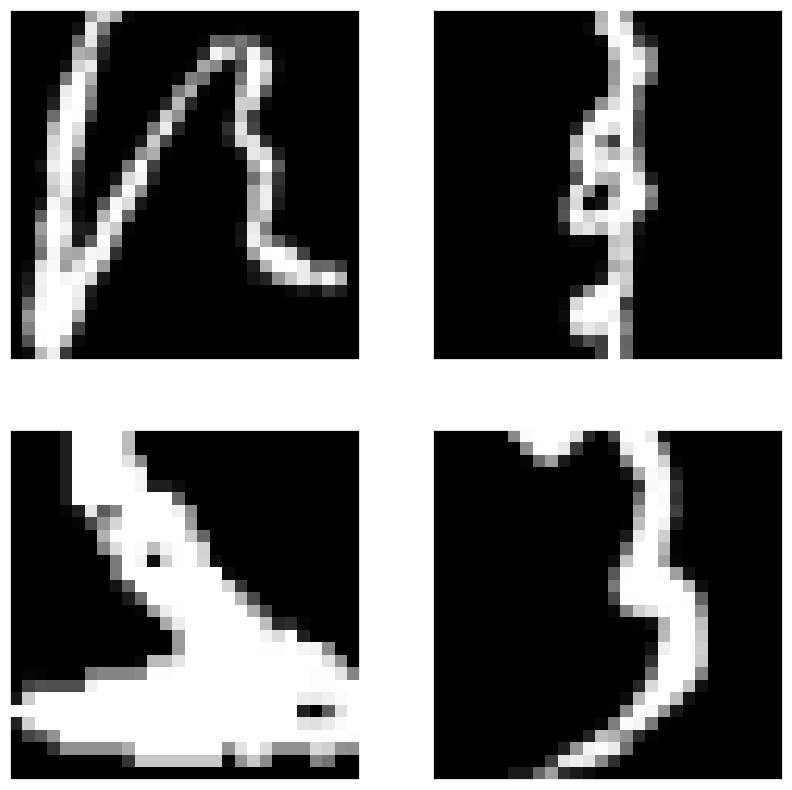

In [15]:
plot_grid(X_train)

## Flattened images
Use Dense layers

In [16]:
# create train and validation datasets, these datasets should use flattened images

X_flatten = np.array(list(map(lambda x: x.flatten(), X)))
X_train, X_val, y_train, y_val = train_test_split(X_flatten, y, stratify = y)

train_dataset = tf.data.Dataset.zip(
        tf.data.Dataset.from_tensor_slices(X_train),
        tf.data.Dataset.from_tensor_slices(y_train),
    )

test_dataset = tf.data.Dataset.zip(
        tf.data.Dataset.from_tensor_slices(X_val),
        tf.data.Dataset.from_tensor_slices(y_val),
    )

2024-08-19 18:03:17.334775: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-19 18:03:17.334799: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-08-19 18:03:17.334803: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-08-19 18:03:17.334820: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-19 18:03:17.334831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
# create model, this model should accept a flattened image

def get_name(prefix: str | None, suffix: str | None, separator: str = "-") -> str | None:
    return prefix and suffix and prefix + separator + suffix

def get_MLP(input_shape: int, # количество элементов в вытянутом изображении
            layers_specification: list[int | list[int]], # спецификация полносвязных слоев
            class_num: int, # количество классов в датасете
            activation: str = "relu", # функция активации
            name: str | None = None # название модели 
           ) -> tf.keras.Model:

    inputs = x = tf.keras.layers.Input((input_shape, ), name=get_name(name, "inputs", "_")) # входной слой принимающий входные вытянутые изображения

    for i, spec in enumerate(layers_specification): # согласно каждой спецификации создаем линейный слой
        x = tf.keras.layers.Dense(units=spec, activation=activation, name=get_name(name, f"dense_{i}"))(x)

    x = tf.keras.layers.Dense(units=class_num, name=get_name(name, "prediction"))(x) # выходной слой

    return tf.keras.Model(inputs=inputs, outputs=x, name=name)

mlp_model = get_MLP(
    input_shape=(X_train.shape[1]),
    layers_specification = [512, 256, 128, 64, 32],
    class_num= np.unique(y_train).shape[0],
    name="MLP_kuzushjii"
)

In [79]:
type(mlp_model)

keras.src.models.functional.Functional

In [32]:
mlp_model.summary()

Model: "MLP_kuzushjii"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MLP_kuzushjii_inputs            │ (None, 784)            │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_kuzushjii-dense_0 (Dense)   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_kuzushjii-dense_1 (Dense)   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_kuzushjii-dense_2 (Dense)   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_kuzushjii-dense_3 (Dense)   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_kuzushjii-dense_4 (Dense)   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_kuzushjii-prediction        │ (None, 49)             │         1,617 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,097 (2.21 MB)

 Trainable params: 578,097 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

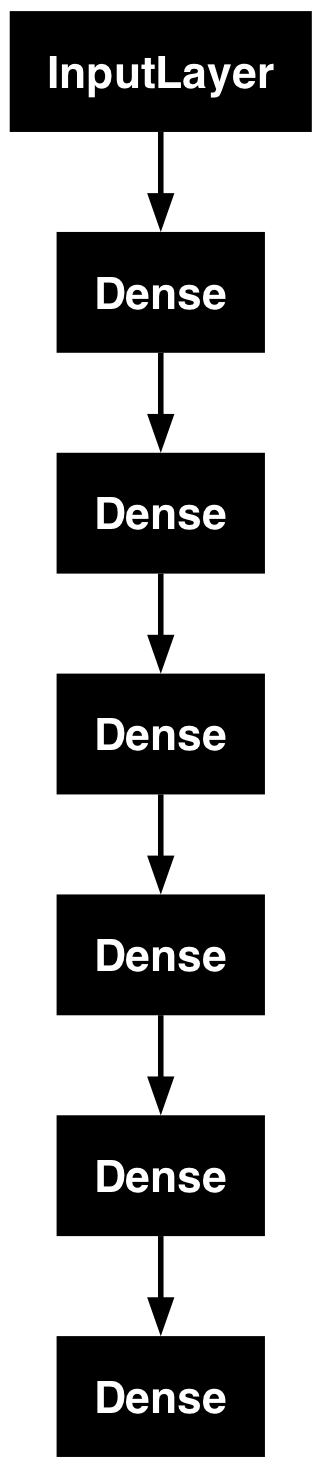

In [33]:
tf.keras.utils.plot_model(mlp_model)

In [45]:
logdir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S') + '.keras')
tensorboard_dir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [46]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(logdir, save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(tensorboard_dir, update_freq=10)
]

In [69]:
# compile the model, make sure to add accuracy metric

#with tf.device("/GPU:0"):

mlp_model = get_MLP(
                        input_shape=(X_train.shape[1]),
                        layers_specification = [512, 256, 128, 64, 32],
                        class_num= np.unique(y_train).shape[0],
                        name="MLP_kuzushjii"
                    )

mlp_model.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics = ['accuracy'])

In [71]:
X_train.shape

(203184, 784)

In [72]:
X_test.shape

(67728, 784)

In [70]:
# train the model, make sure to use callbacks and validation dataset

mlp_model.fit(x=X_train,
              y=y_train,
              epochs=10,
              batch_size=32,
              callbacks = callbacks,
              validation_data=(X_test, y_test),
              verbose=1)

Epoch 1/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 69s 11ms/step - accuracy: 0.3190 - loss: 2.9391 - val_accuracy: 0.7688 - val_loss: 0.9020
Epoch 2/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 92s 15ms/step - accuracy: 0.7870 - loss: 0.8488 - val_accuracy: 0.8351 - val_loss: 0.6614
Epoch 3/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 118s 19ms/step - accuracy: 0.8419 - loss: 0.6385 - val_accuracy: 0.8638 - val_loss: 0.5414
Epoch 4/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 521s 82ms/step - accuracy: 0.8694 - loss: 0.5242 - val_accuracy: 0.8751 - val_loss: 0.5033
Epoch 5/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 68s 11ms/step - accuracy: 0.8864 - loss: 0.4567 - val_accuracy: 0.8913 - val_loss: 0.4564
Epoch 6/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 69s 11ms/step - accuracy: 0.8987 - loss: 0.4173 - val_accuracy: 0.8964 - val_loss: 0.4336
Epoch 7/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 69s 11ms/step - accuracy: 0.9078 - loss: 0.3775 - val_accuracy: 0.9112 - val_loss: 0.3761
Epoch 8/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 70s 11ms/step - accuracy: 0.9135

In [140]:
images = X_test.reshape(-1, 28, 28, 1) # normalize if needed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


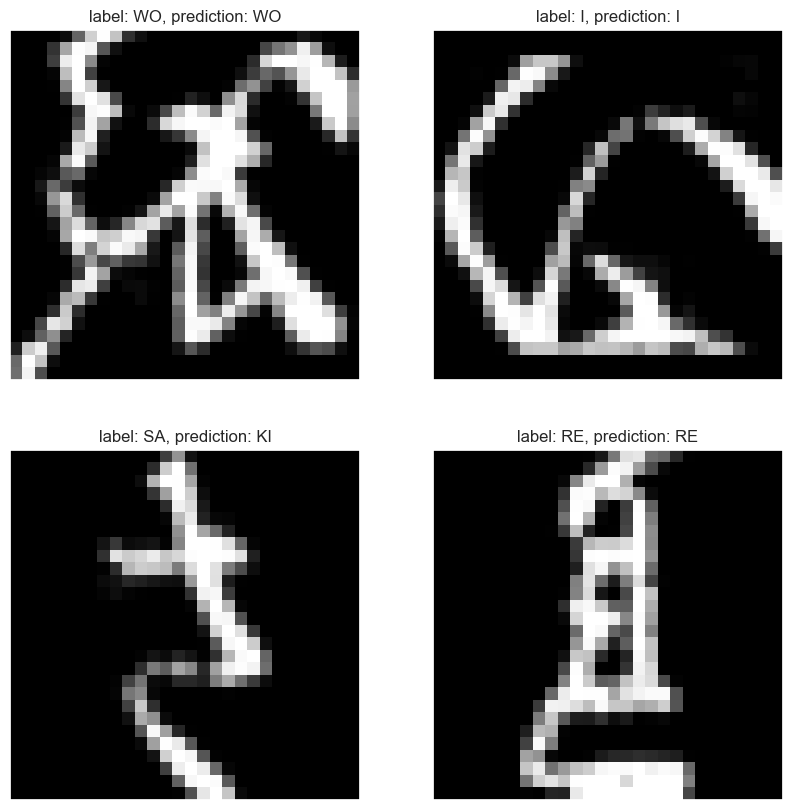

In [132]:
plot_grid_and_label(images, y_test, mlp_model, label_description=label_description)

In [75]:
y_pred = mlp_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

2117/2117 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step


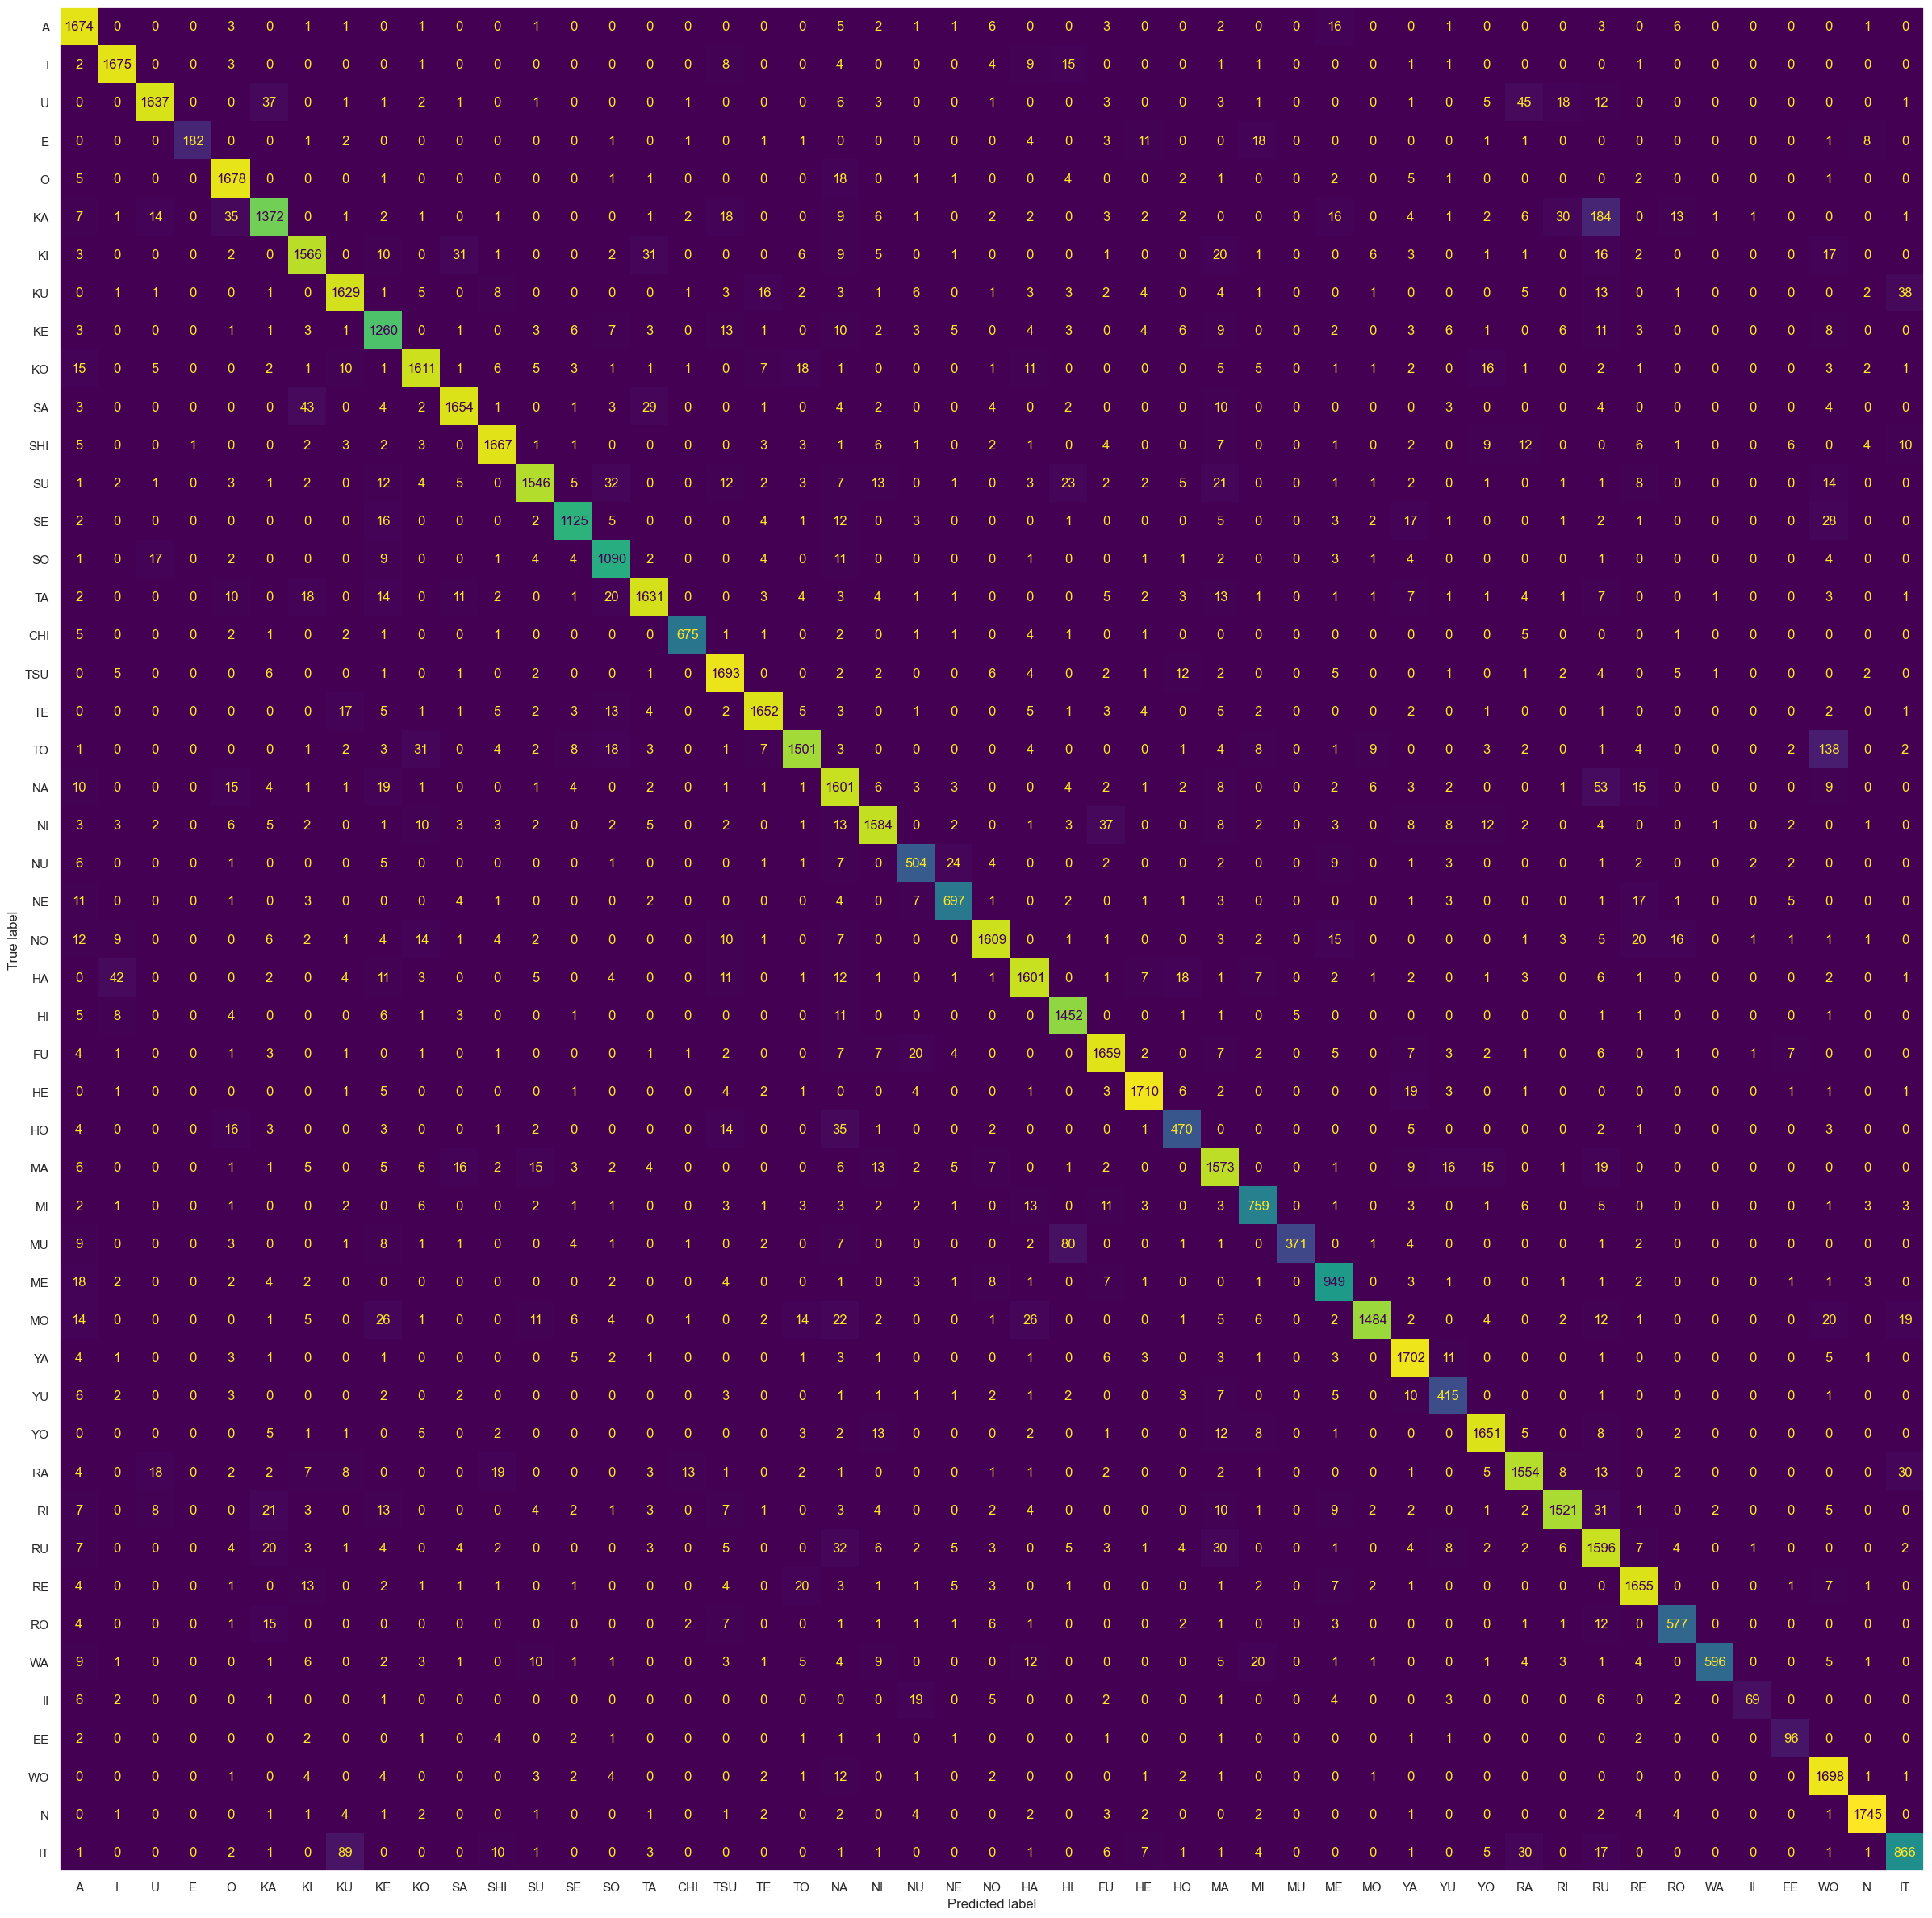

In [76]:
_, ax = plt.subplots(figsize=(30, 30))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_description, ax=ax, colorbar=False)

In [108]:
from sklearn.metrics import confusion_matrix

def get_mistakes_by_threshold(y_true: np.array, y_pred: np.array, threshold: float) -> np.array:
    cfm = confusion_matrix(y_true, y_pred)
    cfm = cfm / cfm.sum(axis=1)
    cfm_mask  = cfm > threshold
    np.fill_diagonal(cfm_mask, False)
    return np.argwhere(cfm_mask)

mistakes_index = get_mistakes_by_threshold(y_test, y_pred, 0.05)
mistakes_labels = np.array([[label_description[x[0]], label_description[x[1]]] for x in mistakes_index])
mistakes_labels

array([['KA', 'RU'],
       ['SHI', 'EE'],
       ['TO', 'WO'],
       ['FU', 'EE'],
       ['MU', 'HI'],
       ['IT', 'KU']], dtype='<U3')

In [111]:
mistakes_index

array([[ 5, 40],
       [11, 45],
       [19, 46],
       [27, 45],
       [32, 26],
       [48,  7]])

In [192]:
label_description[3]

'E'

/var/folders/nf/rd32kdyn0j9fz___z5xdz_q40000gn/T/ipykernel_18990/2281497310.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[row, 0].set_title(f'label: {map_label(true_num_label)}, prediction: {map_label(int(predicted_labels[row]))}')


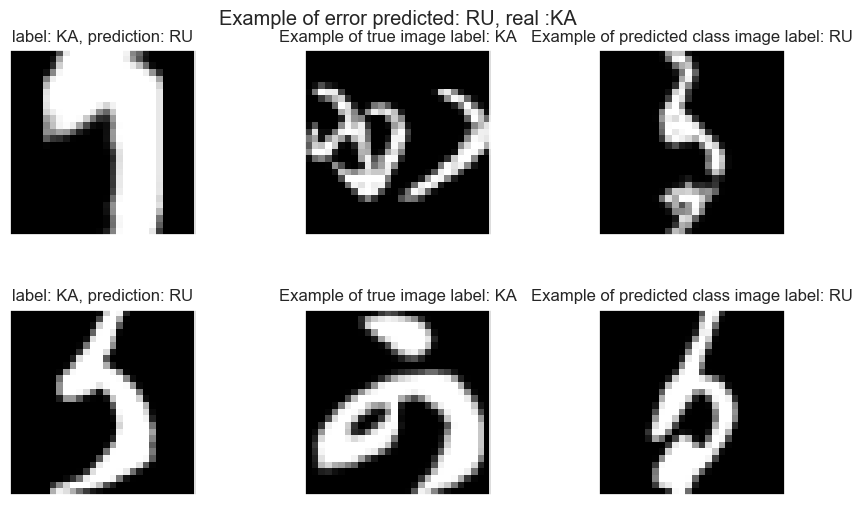

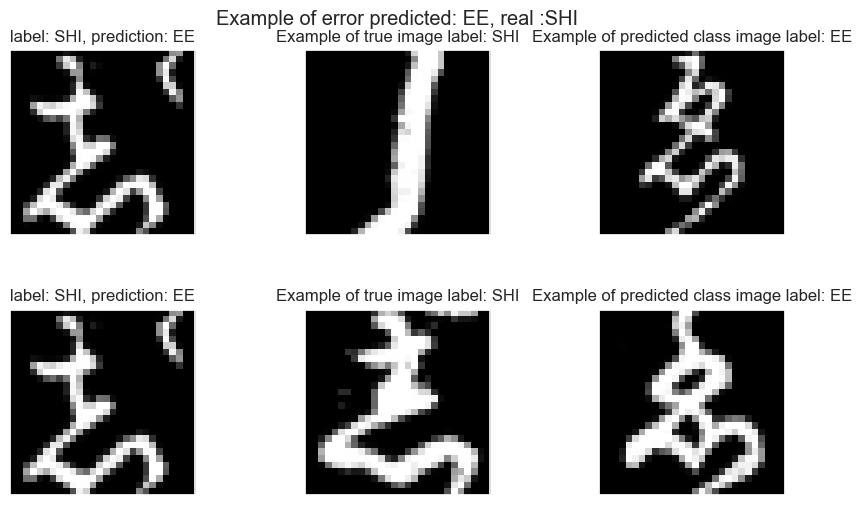

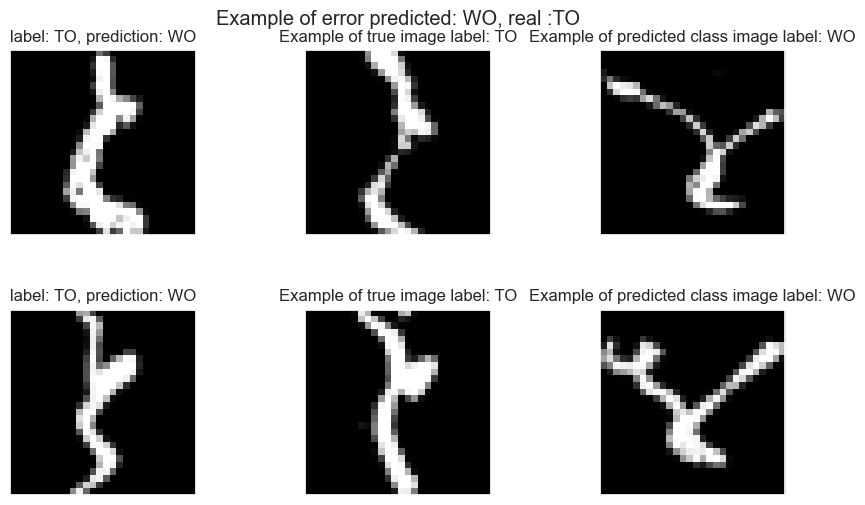

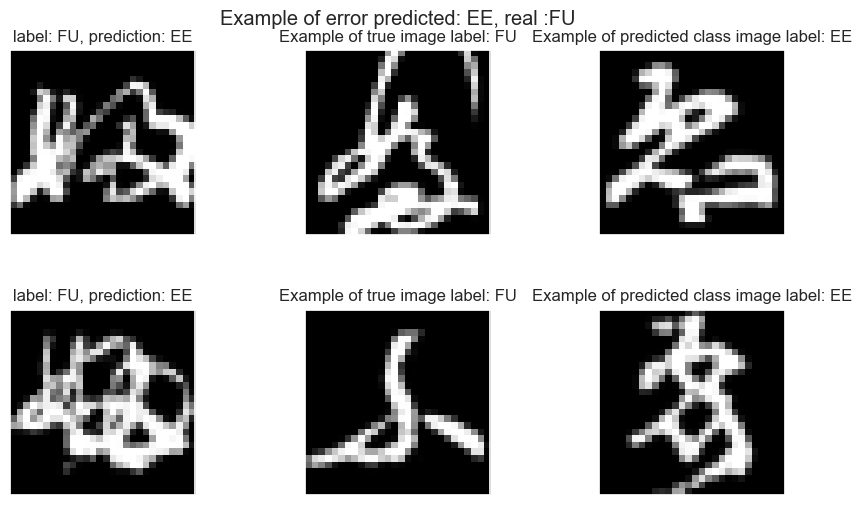

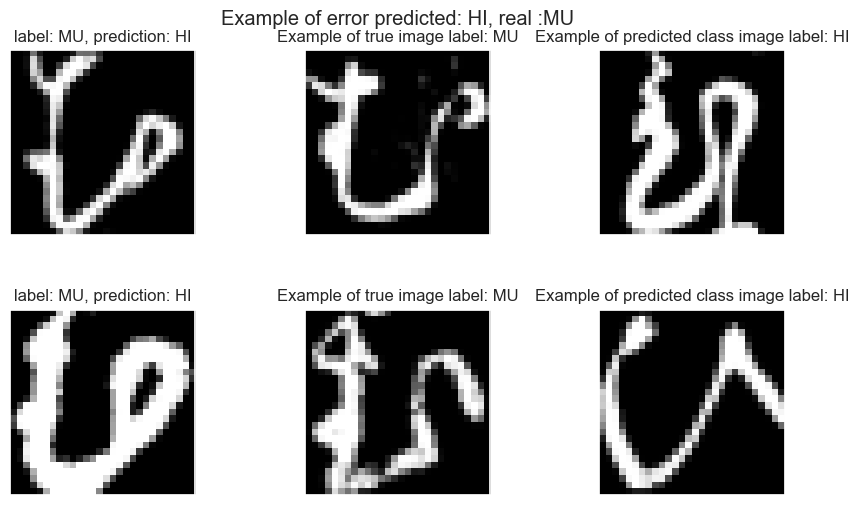

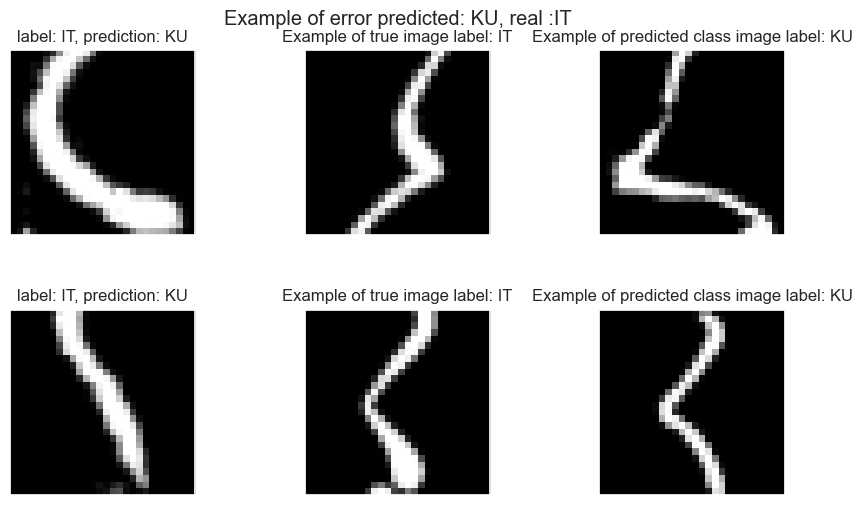

In [207]:
def plot_mistake_and_true(X,
                          y,
                          y_pred,
                          true_num_label,
                          pred_num_label,
                          obj_cnt=1,
                          figsize=(10, 5),
                          hide_axes=True,
                          flatten_image=True,
                          label_description=None):
    
    fig, ax = plt.subplots(nrows = obj_cnt, ncols = 3,  figsize=figsize)
    
    map_label = (lambda x: x) if label_description is None else (lambda x: label_description[x])
    fig.suptitle(f"Example of error predicted: {map_label(pred_num_label)}, real :{map_label(true_num_label)}")
    plt.subplots_adjust(left=0.1, bottom=0.01, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    
    indexes_mistake =  rng.choice(np.argwhere((y != y_pred) & (y == true_num_label) & (y_pred == pred_num_label)), size = obj_cnt) # индексы такие элементы где запредиктили ошибочно 
    indexes_correct =  rng.choice(np.argwhere(y == true_num_label), size = obj_cnt)
    indexes_correct_predict =  rng.choice(np.argwhere(y == pred_num_label), size = obj_cnt)

    imgs_mistake, predicted_labels =  X[indexes_mistake].reshape(-1, 28, 28, 1), y_pred[indexes_mistake] 
    imgs_true = X[indexes_correct].reshape(-1, 28, 28, 1)
    imgs_true_predict = X[indexes_correct_predict].reshape(-1, 28, 28, 1)
    
    map_label = (lambda x: x) if label_description is None else (lambda x: label_description[x])

    for row in range(obj_cnt):
        ax[row, 0].imshow(imgs_mistake[row], cmap = 'gray')
        ax[row, 0].set_title(f'label: {map_label(true_num_label)}, prediction: {map_label(int(predicted_labels[row]))}')
        
        ax[row, 1].imshow(imgs_true[row], cmap = 'gray')
        ax[row, 1].set_title(f'Example of true image label: {map_label(true_num_label)}')

        ax[row, 2].imshow(imgs_true_predict[row], cmap = 'gray')
        ax[row, 2].set_title(f'Example of predicted class image label: {map_label(pred_num_label)}')

        if hide_axes:
            for i in range(3):
                ax[row, i].get_xaxis().set_visible(False)
                ax[row, i].get_yaxis().set_visible(False)

for indexes_labels in mistakes_index: 
    plot_mistake_and_true(X_test, y_test, y_pred, indexes_labels[0], indexes_labels[1], 2, label_description = label_description)

##### Balanced accuracy

In [188]:
accuracy = y_test == y_pred
np.mean([np.mean(accuracy[y_test == i]) for i in range(49)])

0.9018213703169327

## Actual images
Use Conv2D layers with Dense layer on top

In [216]:
# create train and validation datasets, these datasets should use 28x28x1 images

with open('Kuzushjii/X.pickle', 'rb') as handle:
    X = pickle.load(handle)

with open('Kuzushjii/y.pickle', 'rb') as handle:
    y  = pickle.load(handle)
    
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 28, 28, 1), y, stratify = y)



train_dataset = tf.data.Dataset.zip(
        tf.data.Dataset.from_tensor_slices(X_train),
        tf.data.Dataset.from_tensor_slices(y_train),
    )

test_dataset = tf.data.Dataset.zip(
        tf.data.Dataset.from_tensor_slices(X_test),
        tf.data.Dataset.from_tensor_slices(y_test),
    )


In [218]:
# create model, this model should accept a 28x28x1 image
from keras import layers, models

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32,
                            (3,3),
                            activation = 'relu',
                            input_shape=(28,28,1)))
cnn_model.add(layers.MaxPooling2D((2,2)))
cnn_model.add(layers.Conv2D(64,
                            (3,3),
                            activation = 'relu'))
cnn_model.add(layers.MaxPooling2D((2,2)))
cnn_model.add(layers.Conv2D(64,
                            (3,3),
                            activation = 'relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation = 'relu'))
cnn_model.add(layers.Dense(np.unique(y).shape[0], activation = 'softmax'))


In [220]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 49)             │         3,185 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,857 (374.44 KB)

 Trainable params: 95,857 (374.44 KB)

 Non-trainable params: 0 (0.00 B)

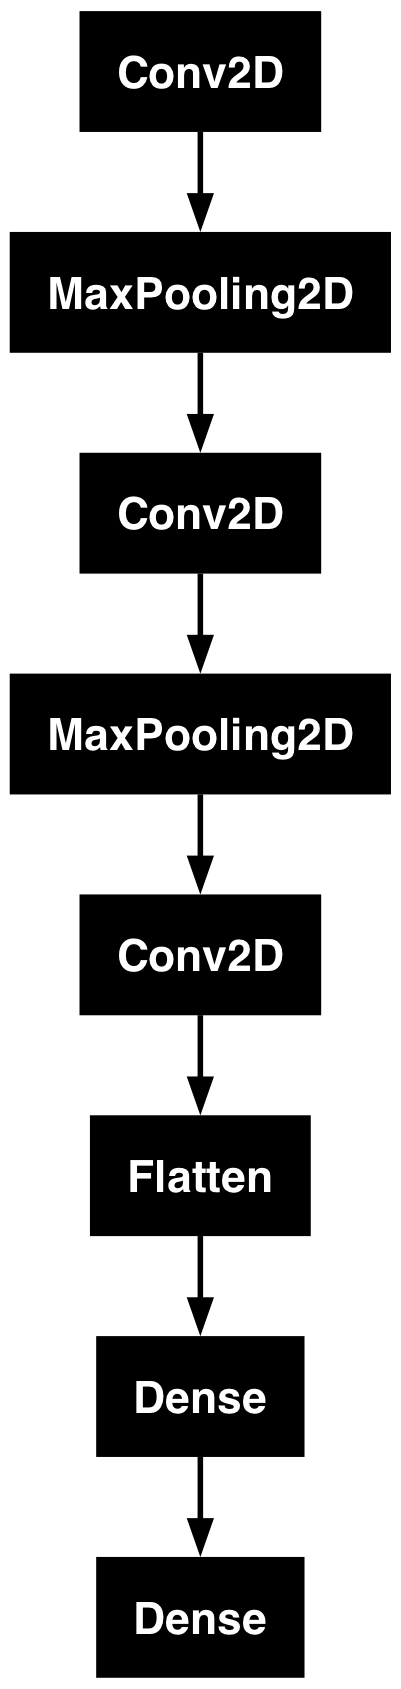

In [222]:
tf.keras.utils.plot_model(cnn_model)

In [224]:
logdir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S') + '.keras')
tensorboard_dir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [225]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(logdir, save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(tensorboard_dir, update_freq=10)
]

In [226]:
# compile the model, make sure to add accuracy metric

cnn_model.compile(optimizer = 'adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])

In [227]:
# train the model, make sure to use callbacks and validation dataset


cnn_model.fit(x=X_train,
            y=y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_test, y_test),
            verbose=1
            )

Epoch 1/10


/Users/rashidganeev/Programming/base_venv/lib/python3.9/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6350/6350 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - accuracy: 0.6760 - loss: 1.3580 - val_accuracy: 0.9003 - val_loss: 0.3613
Epoch 2/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 56s 9ms/step - accuracy: 0.9086 - loss: 0.3281 - val_accuracy: 0.9183 - val_loss: 0.3011
Epoch 3/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.9295 - loss: 0.2510 - val_accuracy: 0.9323 - val_loss: 0.2515
Epoch 4/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.9386 - loss: 0.2175 - val_accuracy: 0.9251 - val_loss: 0.2842
Epoch 5/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.9433 - loss: 0.1971 - val_accuracy: 0.9294 - val_loss: 0.2712
Epoch 6/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.9482 - loss: 0.1817 - val_accuracy: 0.9312 - val_loss: 0.2679
Epoch 7/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.9500 - loss: 0.1746 - val_accuracy: 0.9327 - val_loss: 0.2568
Epoch 8/10
6350/6350 ━━━━━━━━━━━━━━━━━━━━ 56s 9ms/step - accuracy: 0.9522 - loss: 0.1632 - val

In [228]:
images = X_test.reshape(-1, 28, 28, 1) # normalize if needed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


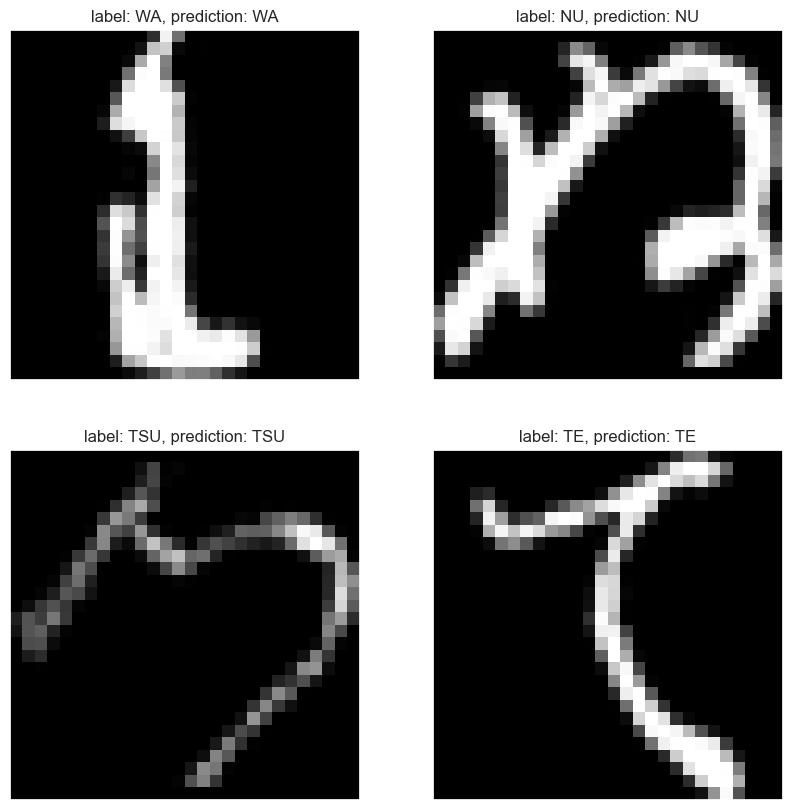

In [230]:
plot_grid_and_label(images, y_test, cnn_model, label_description=label_description, flatten_image=False)

In [232]:
y_pred = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

2117/2117 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


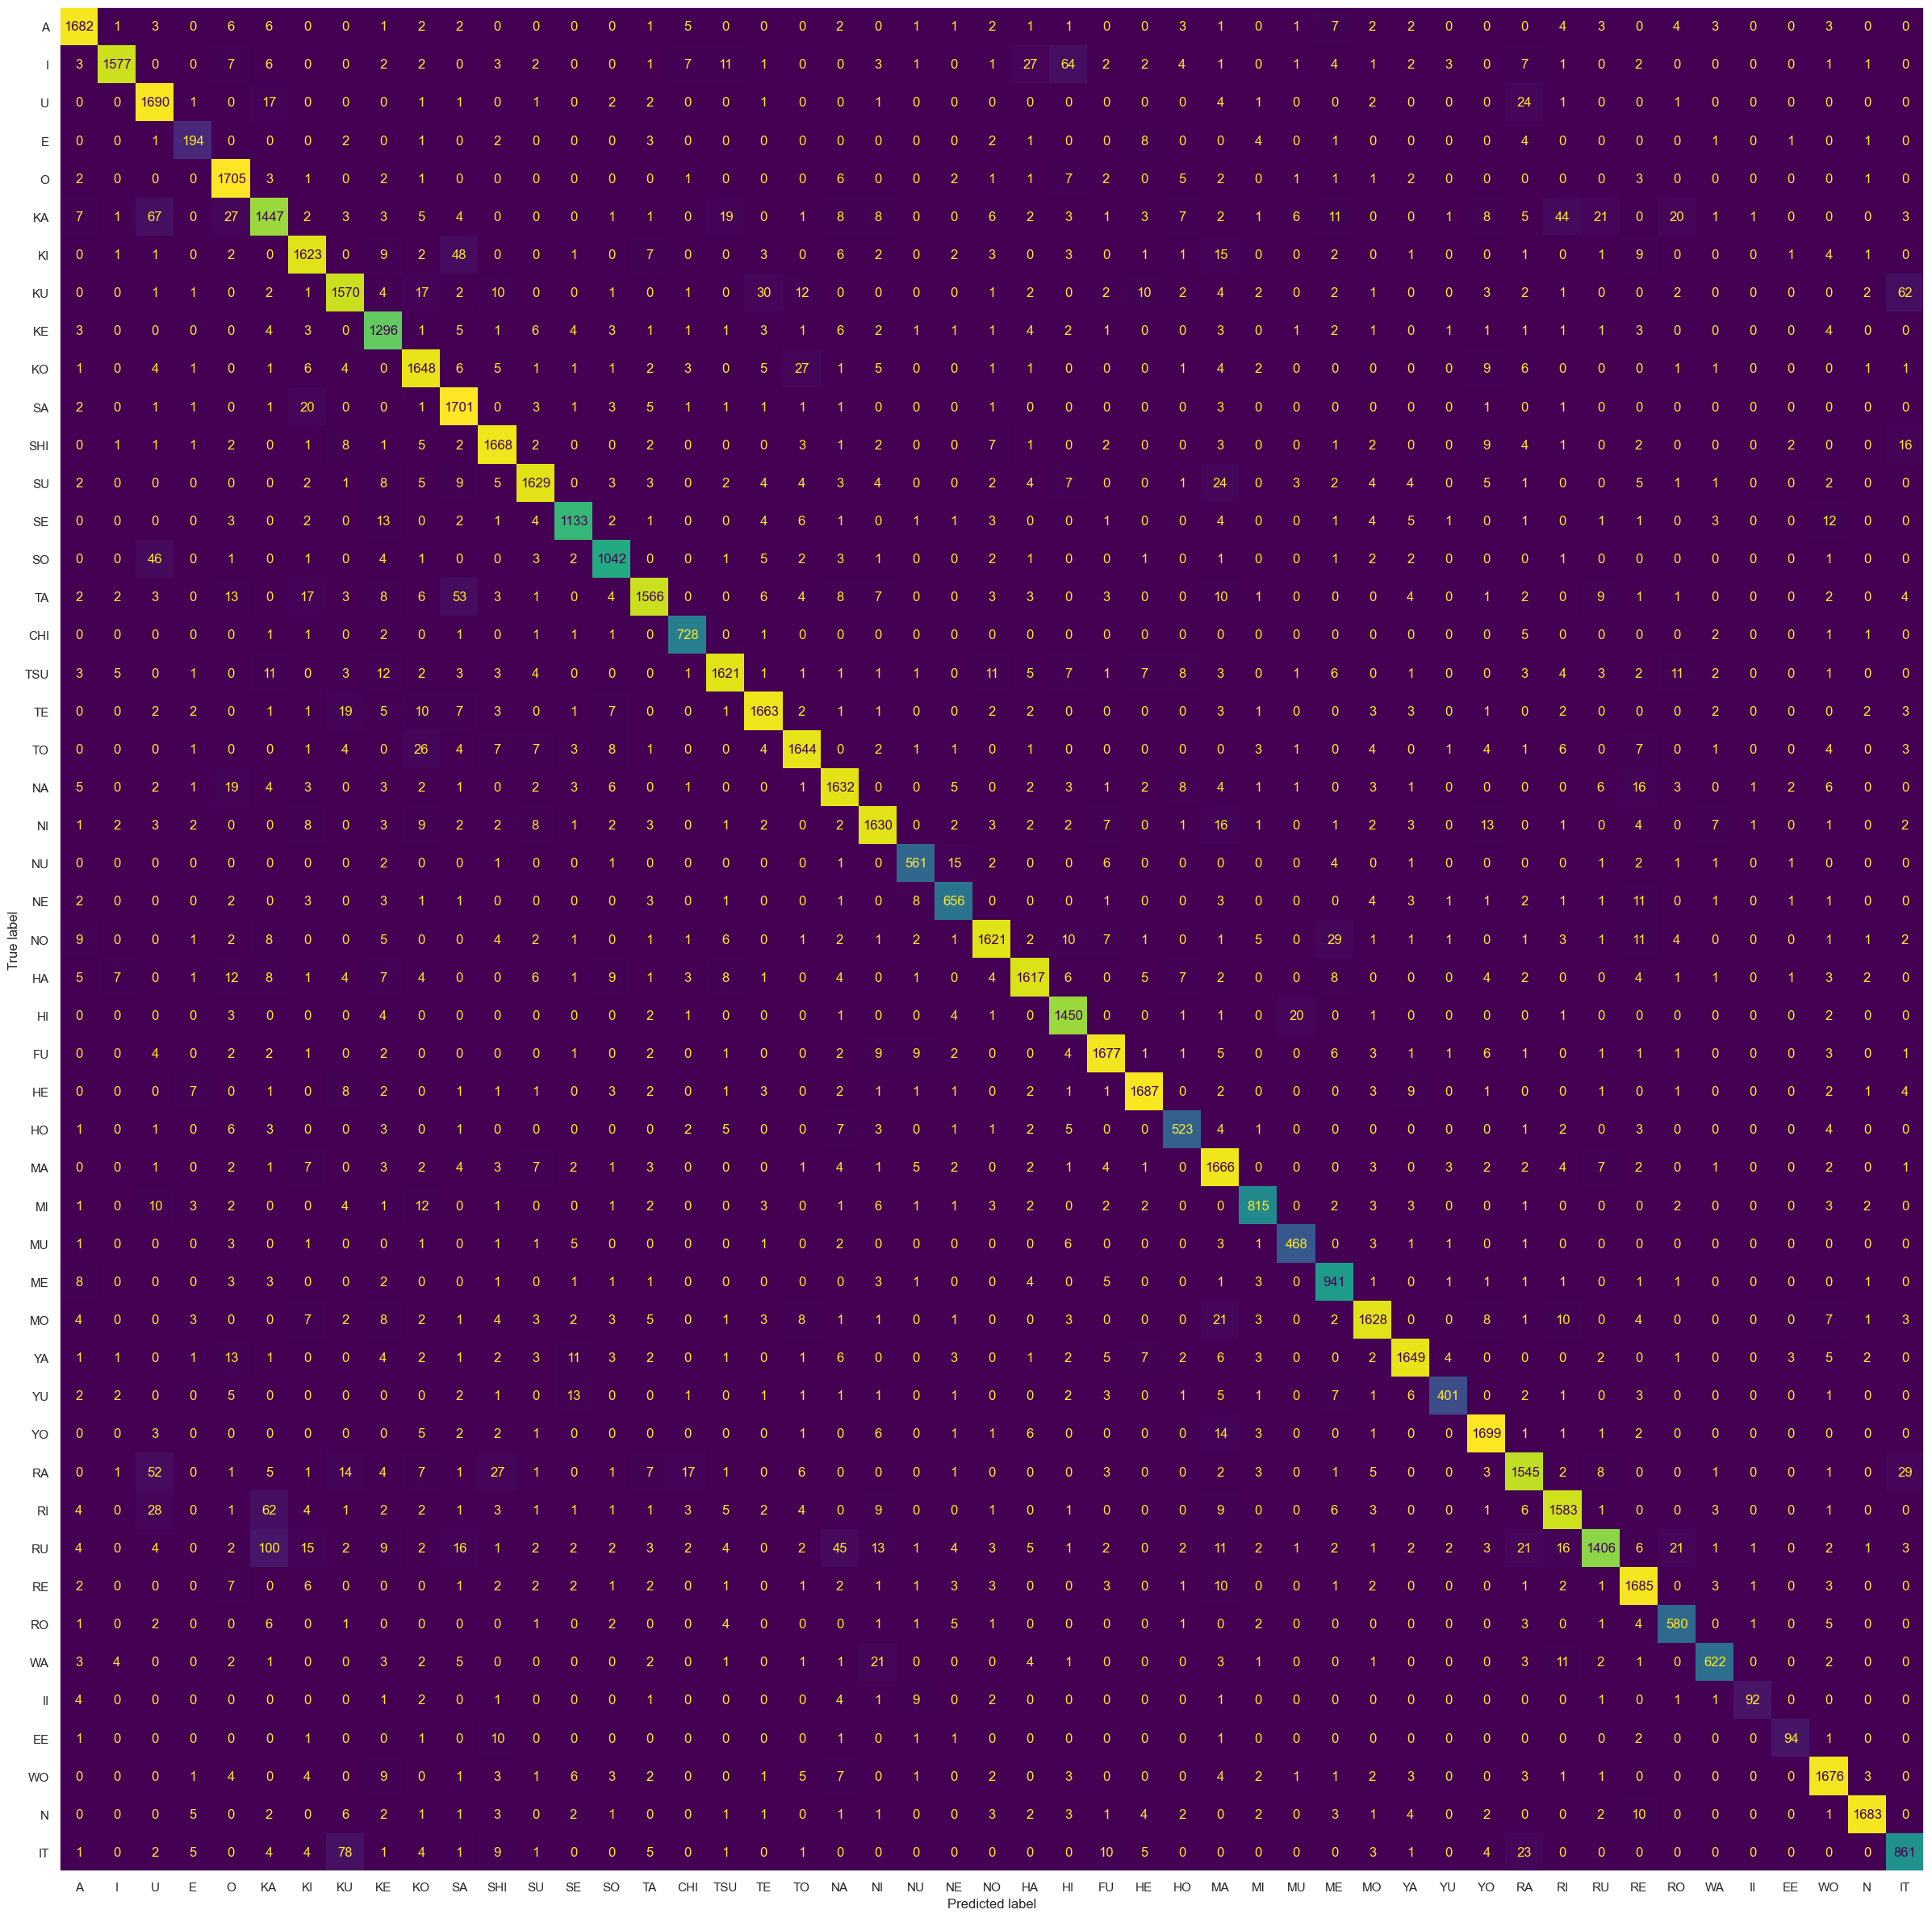

In [233]:
_, ax = plt.subplots(figsize=(30, 30))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_description, ax=ax, colorbar=False)

##### Balanced accuracy

In [234]:
accuracy = y_test == y_pred
np.mean([np.mean(accuracy[y_test == i]) for i in range(49)])

0.9216710196688837

/var/folders/nf/rd32kdyn0j9fz___z5xdz_q40000gn/T/ipykernel_18990/2281497310.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[row, 0].set_title(f'label: {map_label(true_num_label)}, prediction: {map_label(int(predicted_labels[row]))}')


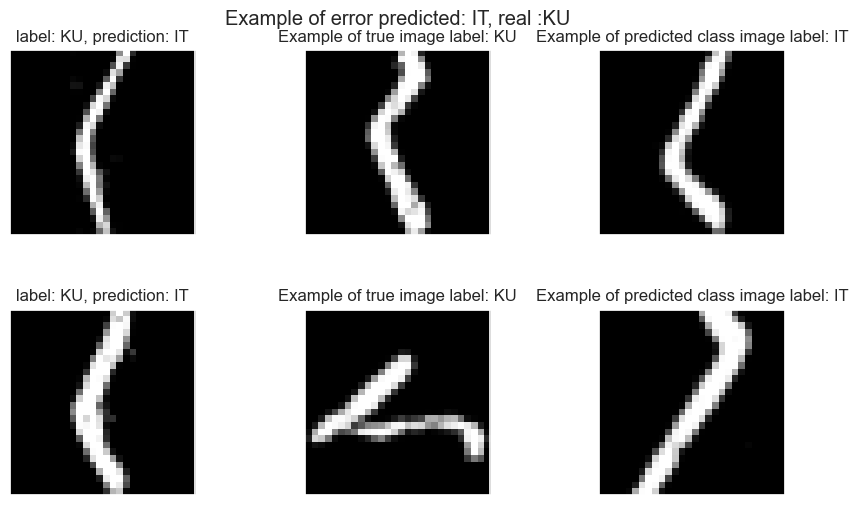

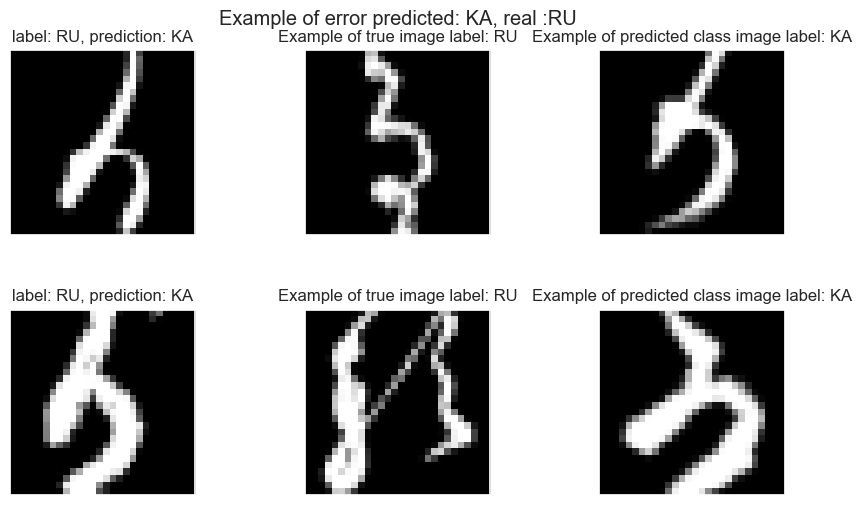

In [235]:
mistakes_index = get_mistakes_by_threshold(y_test, y_pred, 0.05)
mistakes_labels = np.array([[label_description[x[0]], label_description[x[1]]] for x in mistakes_index])
mistakes_labels

for indexes_labels in mistakes_index: 
    plot_mistake_and_true(X_test, y_test, y_pred, indexes_labels[0], indexes_labels[1], 2, label_description = label_description)

In [236]:
mistakes_labels

array([['KU', 'IT'],
       ['RU', 'KA']], dtype='<U2')